In [104]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


In [105]:
df = pd.read_csv(r"data/tumanova.csv")

In [106]:
df

,Модель (полное название),Модель процессора,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Тип оперативной памяти,Вид накопителя,Вид графического ускорителя,Количество ядер,Количество потоков,Результа ты в бенчмарке PCMark10
0,Asus ROG Strix GL703GE,Intel Сore i7-8750H,2018,2.2,4.1,8.0,1.0,9,16,2667,DDR4,HDD,Дискретный и встроенный,6,12,3726
1,Lenovo ThinkPad T440,Intel Core i5-4300U,2013,1.9,2.9,5.0,0.5,3,8,1596,DDR3,HDD,Встроенный,2,4,1846
2,Acer Travel Mate P259-MG-39WS,Intel Core i3-6006U,2016,2.0,2.0,4.0,0.5,3,6,2133,DDR4,HDD,Дискретный и встроенный,2,4,1426
3,MacBook Air Mid 2017,Intel Core i7-5650U,2015,2.2,3.2,5.0,0.5,4,8,1600,DDR3,SSD,Встроенный,2,4,2586
4,MacBook Air Mid 2017,Intel Core i5-5350U,2015,1.8,2.9,5.0,0.5,3,8,1600,DDR3,SSD,Встроенный,2,4,2039
5,hp pavilion gaming 15-dk0064ur,Intel Core i5-9300H,2019,2.4,4.1,8.0,1.0,8,8,2666,DDR4,HDD и SSD,Дискретный и встроенный,4,8,3659
6,Lenovo v580c,Intel Core i5-3230M,2013,2.6,3.2,5.0,0.5,3,6,1600,DDR4,HDD,Дискретный и встроенный,2,4,1824
7,Honor Magicbook Pro 4600H,AMD Ryzen 5 4600H,2020,3.0,4.0,6.5,3.0,8,16,2666,DDR4,SSD,Встроенный,6,12,2868
8,Dexp clv-650-sb,Intel Core i5-4210M,2014,2.6,3.2,5.0,0.5,3,8,1600,DDR3,HDD,Дискретный и встроенный,2,4,2561
9,Dell Vostro 5581,Intel Core i5-8265U,2018,1.6,3.9,4.0,1.0,6,8,2666,DDR4,SSD,Встроенный,4,8,3045


In [107]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Модель (полное название)                       30 non-null     object 
 1   Модель процессора                              30 non-null     object 
 2   Год выпуска процессора                         30 non-null     int64  
 3   Тактовая частота процессора(ГГц)               30 non-null     float64
 4   Максимальная тактовая частота процессора(ГГц)  30 non-null     float64
 5   Частота шины процессора(GT/s)                  30 non-null     float64
 6   Объема кэша L2 процессора(Мб)                  30 non-null     float64
 7   Объема кэша L3 процессора(Мб)                  30 non-null     int64  
 8   Объем оперативной памяти (Гб)                  30 non-null     int64  
 9   Частота оперативной памяти (МГц)               30 non-nu

In [109]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [110]:
useless_cols = ['Модель (полное название)', 'Модель процессора']
num_cols = ['Год выпуска процессора','Тактовая частота процессора(ГГц)', 'Максимальная тактовая частота процессора(ГГц)','Частота шины процессора(GT/s)','Объема кэша L2 процессора(Мб)','Объема кэша L3 процессора(Мб)','Объем оперативной памяти (Гб)','Частота оперативной памяти (МГц)','Количество ядер','Количество потоков']
cat_cols = ['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']
label = ['Результа ты в бенчмарке PCMark10']

In [111]:
df[cat_cols].dtypes

Тип оперативной памяти         object
Вид накопителя                 object
Вид графического ускорителя    object
dtype: object

In [112]:
df[num_cols].dtypes

Год выпуска процессора                             int64
Тактовая частота процессора(ГГц)                 float64
Максимальная тактовая частота процессора(ГГц)    float64
Частота шины процессора(GT/s)                    float64
Объема кэша L2 процессора(Мб)                    float64
Объема кэша L3 процессора(Мб)                      int64
Объем оперативной памяти (Гб)                      int64
Частота оперативной памяти (МГц)                   int64
Количество ядер                                    int64
Количество потоков                                 int64
dtype: object

## Номинальные признаки

In [113]:
cat_cols

['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']

In [114]:
df['Тип оперативной памяти'] = pd.get_dummies(df['Тип оперативной памяти'])['DDR4']

In [115]:
df['Вид графического ускорителя'] = pd.get_dummies(df['Вид графического ускорителя'])['Дискретный и встроенный']

In [116]:
drive = pd.get_dummies(df['Вид накопителя'])
drive.loc[drive['HDD и SSD']==1, ['HDD', 'SSD']] = 1
drive = drive.drop('HDD и SSD', axis=1)
df.drop('Вид накопителя', axis=1)
cat_df = pd.concat([df[['Тип оперативной памяти', 'Вид графического ускорителя']], drive], axis=1) 

In [117]:
cat_df

,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD
0,1,1,1,0
1,0,0,1,0
2,1,1,1,0
3,0,0,0,1
4,0,0,0,1
5,1,1,1,1
6,1,1,1,0
7,1,0,0,1
8,0,1,1,0
9,1,0,0,1


In [118]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [119]:
data = pd.concat([df[num_cols], cat_df, df[label]], axis=1)

In [120]:
data

,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Количество ядер,Количество потоков,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD,Результа ты в бенчмарке PCMark10
0,2018,2.2,4.1,8.0,1.0,9,16,2667,6,12,1,1,1,0,3726
1,2013,1.9,2.9,5.0,0.5,3,8,1596,2,4,0,0,1,0,1846
2,2016,2.0,2.0,4.0,0.5,3,6,2133,2,4,1,1,1,0,1426
3,2015,2.2,3.2,5.0,0.5,4,8,1600,2,4,0,0,0,1,2586
4,2015,1.8,2.9,5.0,0.5,3,8,1600,2,4,0,0,0,1,2039
5,2019,2.4,4.1,8.0,1.0,8,8,2666,4,8,1,1,1,1,3659
6,2013,2.6,3.2,5.0,0.5,3,6,1600,2,4,1,1,1,0,1824
7,2020,3.0,4.0,6.5,3.0,8,16,2666,6,12,1,0,0,1,2868
8,2014,2.6,3.2,5.0,0.5,3,8,1600,2,4,0,1,1,0,2561
9,2018,1.6,3.9,4.0,1.0,6,8,2666,4,8,1,0,0,1,3045


## Анализ критических значений

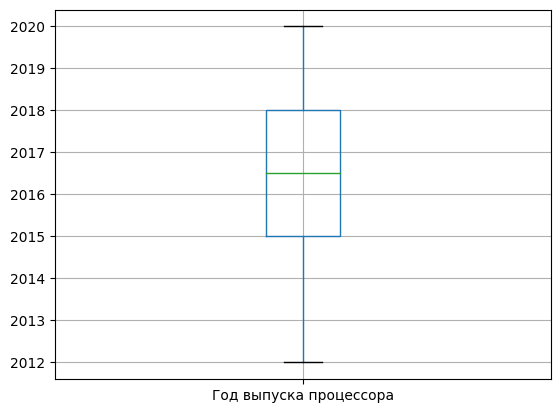

In [121]:
data.boxplot(num_cols[0])
None

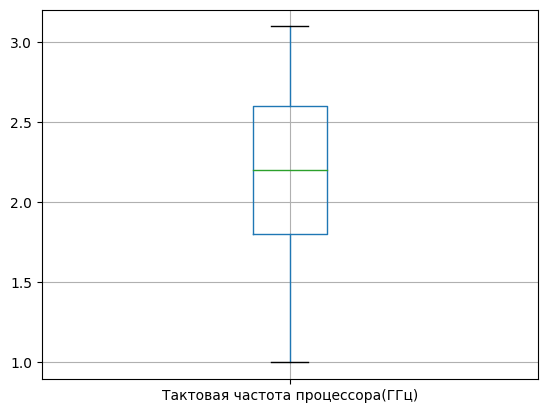

In [122]:
data.boxplot(num_cols[1])
None

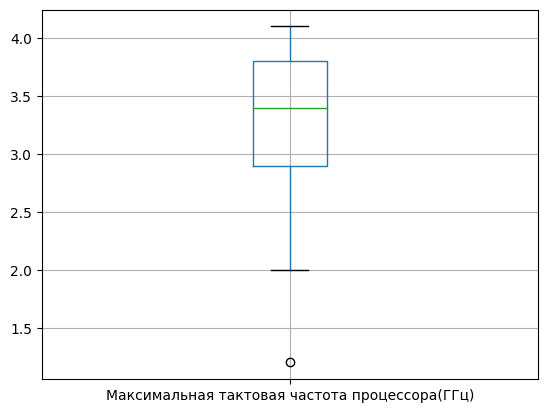

In [123]:
data.boxplot(num_cols[2])
None

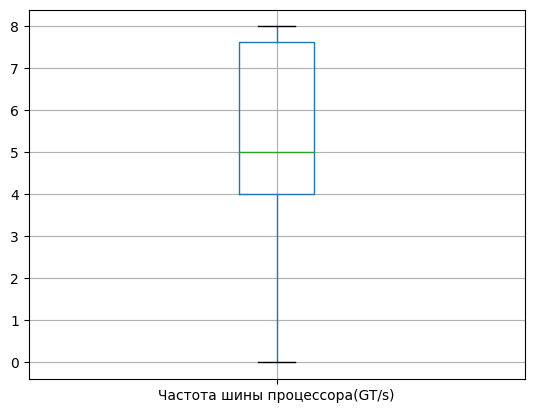

In [124]:
data.boxplot(num_cols[3])
None

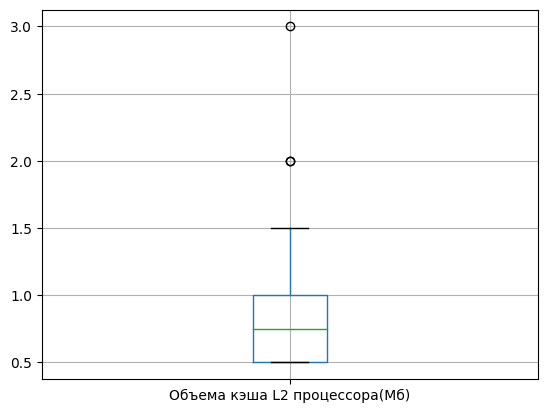

In [125]:
test = data.boxplot(num_cols[4], return_type='dict')
None

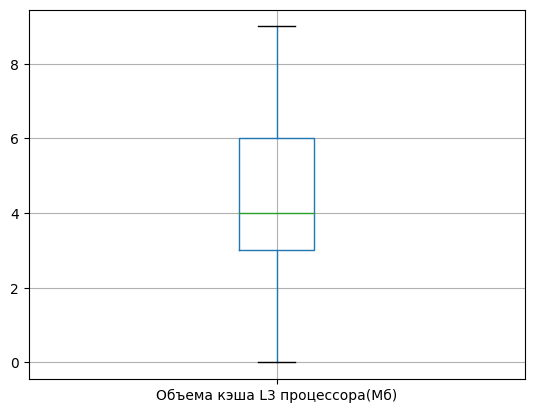

In [126]:
data.boxplot(num_cols[5])
None

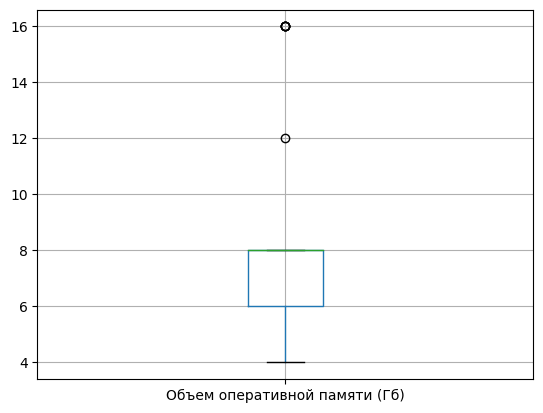

In [127]:
data.boxplot(column=num_cols[6])
None

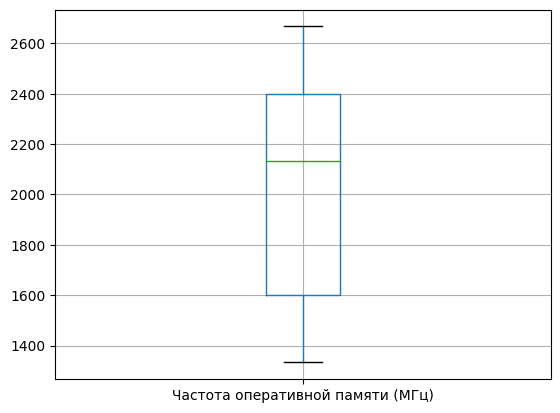

In [128]:
data.boxplot(column=num_cols[7])
None

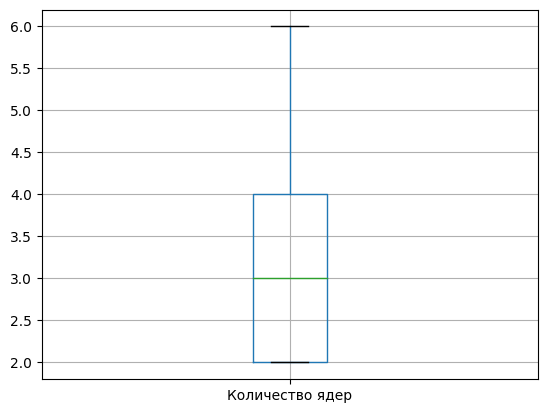

In [129]:
data.boxplot(num_cols[8])
None

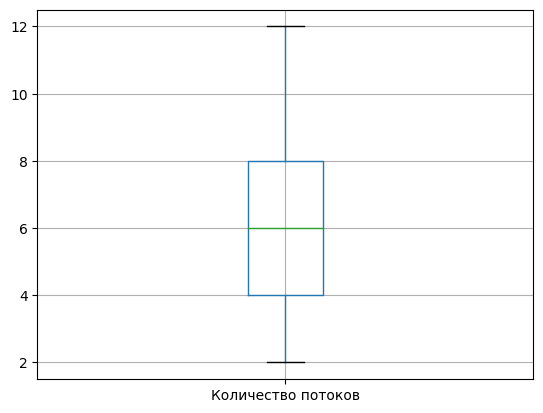

In [130]:
data.boxplot(num_cols[9])
None

In [131]:
def get_outlier(data, num_cols):
    res = {}
    for col in num_cols:
        q75, q25 = np.percentile(data[col], [75, 25])
        intr_qr = q75-q25
        top = q75+(1.5*intr_qr)
        low = q25-(1.5*intr_qr)
        out_arr = [data[data[col] > top].index.tolist()]
        out_arr.append(data[data[col] < low].index.tolist())
        res[col] = out_arr
    return res

In [132]:
get_outlier(data, num_cols)

{'Год выпуска процессора': [[], []],
 'Тактовая частота процессора(ГГц)': [[], []],
 'Максимальная тактовая частота процессора(ГГц)': [[], [27]],
 'Частота шины процессора(GT/s)': [[], []],
 'Объема кэша L2 процессора(Мб)': [[7, 17, 27], []],
 'Объема кэша L3 процессора(Мб)': [[], []],
 'Объем оперативной памяти (Гб)': [[0, 7, 11, 14, 18, 25], []],
 'Частота оперативной памяти (МГц)': [[], []],
 'Количество ядер': [[], []],
 'Количество потоков': [[], []]}

In [146]:
data = data.drop(index=[7])

<AxesSubplot:>

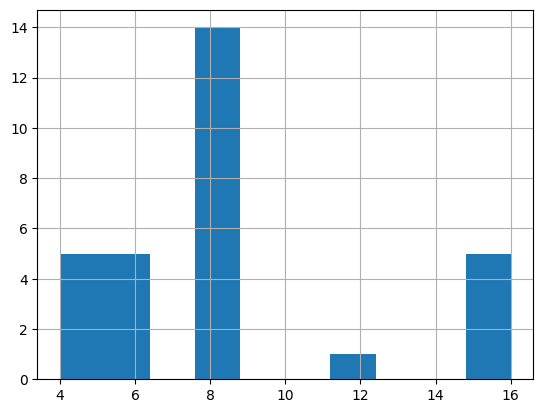

In [134]:
data['Объем оперативной памяти (Гб)'].hist()

In [150]:
data.loc[data['Объема кэша L3 процессора(Мб)'] == 0]['Объема кэша L3 процессора(Мб)']=np.NaN

In [143]:
data.columns

Index(['Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Количество ядер',
       'Количество потоков', 'Тип оперативной памяти',
       'Вид графического ускорителя', 'HDD', 'SSD',
       'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [160]:
data = data.loc[(data['Частота шины процессора(GT/s)'] != 0) & (data['Объема кэша L3 процессора(Мб)'] != 0)]

In [164]:
num_cols

['Год выпуска процессора',
 'Тактовая частота процессора(ГГц)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объема кэша L2 процессора(Мб)',
 'Объема кэша L3 процессора(Мб)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Количество ядер',
 'Количество потоков']

In [165]:
data['Объем оперативной памяти (Гб)'] = (data['Объем оперативной памяти (Гб)'] // 8 > 0).astype(int)

In [166]:
data

,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Количество ядер,Количество потоков,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD,Результа ты в бенчмарке PCMark10
0,2018,2.2,4.1,8.0,1.0,9,1,2667,6,12,1,1,1,0,3726
1,2013,1.9,2.9,5.0,0.5,3,1,1596,2,4,0,0,1,0,1846
2,2016,2.0,2.0,4.0,0.5,3,0,2133,2,4,1,1,1,0,1426
3,2015,2.2,3.2,5.0,0.5,4,1,1600,2,4,0,0,0,1,2586
4,2015,1.8,2.9,5.0,0.5,3,1,1600,2,4,0,0,0,1,2039
5,2019,2.4,4.1,8.0,1.0,8,1,2666,4,8,1,1,1,1,3659
6,2013,2.6,3.2,5.0,0.5,3,0,1600,2,4,1,1,1,0,1824
8,2014,2.6,3.2,5.0,0.5,3,1,1600,2,4,0,1,1,0,2561
9,2018,1.6,3.9,4.0,1.0,6,1,2666,4,8,1,0,0,1,3045
10,2018,2.3,4.0,8.0,1.0,8,0,2666,4,8,1,1,1,0,2869


In [167]:
def get_std_coefs(X, y):
    res = [0]
    X_z = sm.add_constant(X.select_dtypes(include=[np.number]).dropna().apply(stats.zscore))
    Y_z = pd.DataFrame(y).apply(stats.zscore)
    model = sm.OLS(Y_z, X_z).fit()
    res.extend(model.params.tolist())
    return pd.Series(res)

In [168]:
def get_pivot(df, model, param, label, num):
    pivot_test = pd.DataFrame()
    predictors = model.params.index.tolist()
    n = len(predictors)
    i = np.ones(n).astype(int) * num
    pivot_test['id'] = pd.Series(i)
    pivot_test['predictors'] = predictors
    pivot_test['b'] = model.params.tolist()
    pivot_test['std_err'] = model.bse.tolist()
    influence = model.get_influence()
    pivot_test['std coef'] = get_std_coefs(df[param], df[label])
    pivot_test['t'] = model.tvalues.tolist()
    pivot_test['lower interval'] = model.conf_int(alpha=0.05)[:][0].tolist()
    pivot_test['upper interval'] = model.conf_int(alpha=0.05)[:][1].tolist()
    return pivot_test.set_index('id')

In [219]:
label = 'Результа ты в бенчмарке PCMark10'

In [220]:
X_data = data.drop(label, axis=1)
Y_data = data.drop(X_data.columns, axis=1)

In [222]:
predictors = data.drop(label, axis=1).to_dict()
sorted_predictors = sorted(predictors, key=lambda x: abs(data[x].corr(data[label])))

In [223]:
sorted_predictors

['HDD',
 'Тактовая частота процессора(ГГц)',
 'Вид графического ускорителя',
 'SSD',
 'Тип оперативной памяти',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Объема кэша L2 процессора(Мб)',
 'Год выпуска процессора',
 'Объема кэша L3 процессора(Мб)',
 'Количество потоков',
 'Количество ядер']

In [225]:
pred_list = []
Y = data[label]
pivot_df = pd.DataFrame()
i = 1
for predictor in sorted_predictors:
    pred_list.append(predictor)
    X = sm.add_constant(data[pred_list])
    model = sm.OLS(Y, X).fit()
    F_crit = model.tvalues ** 2
    if F_crit[predictor] < 3.84:
        pred_list.pop()
    else:
        remove_list = list(F_crit[F_crit <= 2.71].index)
        for el in remove_list:
            if el in pred_list:
                pred_list.remove(el)
    if len(pred_list) != 0:
        model_info = get_pivot(data, model, pred_list, label, i)
        pivot_df = pd.concat([pivot_df, model_info], axis=0)
        i += 1

In [226]:
pivot_df

,predictors,b,std_err,std coef,t,lower interval,upper interval
id,,,,,,,
1,const,2353.545455,249.550683,0.000000e+00,9.431132,1839.586201,2867.504708
1,SSD,724.079545,324.175847,5.898060e-17,2.233601,56.426891,1391.732200
2,const,1891.904762,278.424201,0.000000e+00,6.795044,1317.265454,2466.544070
2,SSD,550.964286,295.313461,5.898060e-17,1.865693,-58.532741,1160.461313
2,Тип оперативной памяти,846.341270,307.809536,3.103573e-01,2.749562,211.053612,1481.628928
3,const,229.753432,543.974754,0.000000e+00,0.422360,-895.544083,1355.050948
3,SSD,505.025430,246.958532,8.673617e-17,2.044981,-5.847217,1015.898077
3,Тип оперативной памяти,560.963529,270.532810,2.844800e-01,2.073551,1.323773,1120.603285
3,Максимальная тактовая частота процессора(ГГц),584.676347,172.992651,3.031617e-01,3.379776,226.813784,942.538910


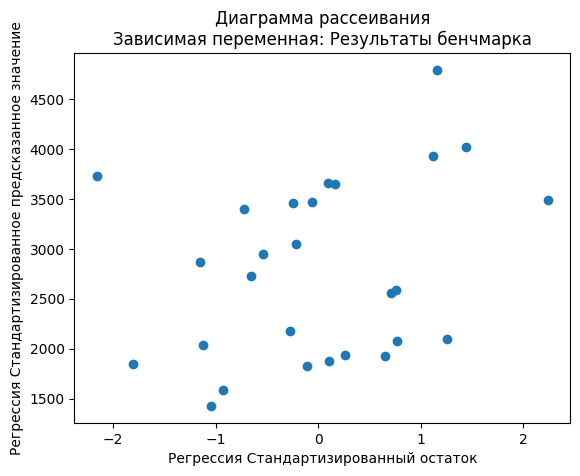

In [228]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
plt.scatter(standardized_residuals,data[label])
plt.title("Диаграмма рассеивания\nЗависимая переменная: Результаты бенчмарка")
plt.xlabel("Регрессия Стандартизированный остаток")
plt.ylabel("Регрессия Стандартизированное предсказанное значение")
None


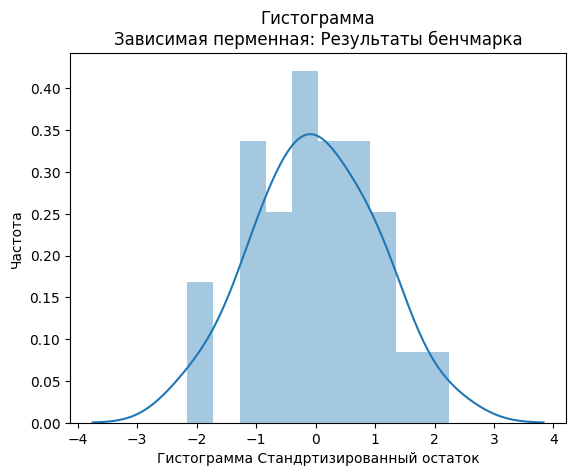

In [230]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
plt.title("Гистограмма\nЗависимая перменная: Результаты бенчмарка")
plt.xlabel("Гистограмма Стандртизированный остаток")
plt.ylabel("Частота")

sns.distplot(standardized_residuals, bins = 10)
None


In [231]:
#F - test
print("Тест RESET Рамсея")
ram = sm.stats.diagnostic.linear_reset(model, power=2, use_f = True)
# R^2
print("\nR =",sqrt(model.rsquared))
print("R^2 = ",model.rsquared)
print("Cкорректированный R^2=",model.rsquared_adj)

print("\nF - статистика = ",model.fvalue)
f_crit = stats.f.ppf(q = ram.pvalue, dfn=ram.df_num,dfd = ram.df_denom)
print("F критическое =",f_crit)



Тест RESET Рамсея

R = 0.9491473269314001
R^2 =  0.9008806482210221
Cкорректированный R^2= 0.8772808025593607

F - статистика =  38.17315846622366
F критическое = 1.9528275140193991


In [232]:
if model.fvalue <f_crit:
    print("Так как F - статистика < критического значения (",f_crit,"), Модель не правильно специфицирована")
else:
    print("Так как F - статистика >= критического значения (",f_crit,"), Модель правильно специфицирована")
    # VIF
    vif = pd.DataFrame()
    vif["predictors"] = model.params.index
    vif ["VIF values"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    print(vif)
    if max(vif["VIF values"])>=10:
        print("Присутствует мульиколлинеарность")
    else:
        print("Мультиколлинеарность не присутствует")
        dw = sm.stats.stattools.durbin_watson(model.resid)
        print("\nЗначение критерия Дурбина - Уотсона: ", dw)
        if abs(4 - dw) < abs(2 - dw):
            print("Отрицательная автокорреляция")
        elif dw < abs(2 - dw):
            print("Положительная автокорреляция")
        else:
            print("Остатки независимы")
            #print(model.summary())
            sh = shapiro(model.resid)
            print("\nЗначение критерия Шапиро", sh.statistic, "Значение коэффициента p", sh.pvalue)
            if sh.pvalue<0.05:
                print("Остатки не распределены нормально (p<0.05)")
            else:
                print("Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)")

Так как F - статистика >= критического значения ( 1.9528275140193991 ), Модель правильно специфицирована
                      predictors  VIF values
0                          const   13.420555
1  Частота шины процессора(GT/s)    1.722819
2  Объем оперативной памяти (Гб)    1.451012
3  Объема кэша L2 процессора(Мб)    2.093941
4  Объема кэша L3 процессора(Мб)    8.792954
5                Количество ядер   10.752622
Присутствует мульиколлинеарность
